In [36]:
import sys
sys.path.append('../utils')
import simulation as sim
import numpy as np
import random

# Definir el plano del hospital


In [37]:
width = 53
height = 36
hospital = sim.Hospital(width, height)

for i in range(width):
    hospital.add_element(sim.Wall((i, 0)))
    hospital.add_element(sim.Wall((i, height - 1)))
for i in range(height):
    hospital.add_element(sim.Wall((0, i)))
    hospital.add_element(sim.Wall((width-1, i)))
    
for y in range(36):
    l = (4, 5, 13, 19, 25, 31)
    if y not in l:
        hospital.add_element(sim.Wall((9, y)))
        
for x in range(9):
    for y in (10, 16, 22, 28):
        hospital.add_element(sim.Wall((x, y)))

for y in range(9):
    if y not in (5, 6):
        hospital.add_element(sim.Wall((14, y)))

for y in range(9, 19):
    for x in (14, 23, 32, 41):
        hospital.add_element(sim.Wall((x, y)))

for x in range(14, 52):
    hospital.add_element(sim.Wall((x, 9)))
    
    if x not in (19, 28, 38, 46, 18, 27, 36, 45):
        hospital.add_element(sim.Wall((x, 18)))
        
for x in range(29, 52):
    hospital.add_element(sim.Wall((x, 23)))

for x in range(29, 40):
    if x not in (34, 35):
        hospital.add_element(sim.Wall((x, 28)))

for y in range(23, 28):
    hospital.add_element(sim.Wall((29, y)))
    hospital.add_element(sim.Wall((39, y)))
    
hospital.add_element(sim.Entry((width-9, height-1)))
hospital.add_element(sim.Exit((width-8, height-1)))
hospital.add_element(sim.ICU((14, 5)))

for y in (13, 19, 25, 31):
    hospital.add_element(sim.DoctorOffice('general_practitioner', (3, y), (4, y)))
hospital.add_element(sim.DoctorOffice('psychiatrist', (3, 5), (4, 5)))
hospital.add_element(sim.DoctorOffice('surgeon', (18, 13), (18, 14)))
hospital.add_element(sim.DoctorOffice('pediatry', (27, 13), (27, 14)))
hospital.add_element(sim.DoctorOffice('gynecologist', (36, 13), (36, 14)))
hospital.add_element(sim.DoctorOffice('geriatrics', (45, 13), (45, 14)))

hospital.add_element(sim.Receptionist((45, 25), (45, 27)))
hospital.add_element(sim.Receptionist((48, 25), (48, 27)))

hospital.add_element(sim.Triage((35, 26)))

for x in range(14, 28, 2):
    for y in range(22, 31, 2):
        hospital.add_element(sim.Chair((x, y)))

# Imprime el hospital para tener algún tipo de feedback
hospital.plot().to_console()

############################################EX#######
#        #                                          #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    h h h h h h h                         #
#        #                                          #
##########    h h h h h h h  #####  ####            #
#        #                   #         #     P  P   #
#        #    h h h h h h h  #     T   #            #
#  DP                        #         #     R  R   #
#        #    h h h h h h h  #         #            #
#        #                   ########################
##########    h h h h h h h                         #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    ####  #######  ####### # ######  ######
#        #    #        #    

# Agrega los parámetros de simulación

In [38]:

hospital.parameters = {
    'objects': {
        'chair': {
            'infect_probability': 0.1,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0),
            'radius': 0.1
        },
        'bed': {
            'infect_probability': 0.0,
            'radius': 0.0,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0)
        }
    },
    'icu': {
        'environment': {
            'infection_probability': 0.1
        },
        'beds': 5,
        'death_probability': 0.05,
        'sleep_times': [
            {
                'time': sim.TimePeriod(1, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(2, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(4, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(8, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(16, 0, 0, 0),
                'probability': 0.2
            }
        ]
    },
    'reception': {
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'triage': {
        'icu': {
            'death_probability': 0.2,
            'probability': 0.070724557
        },
        'doctors_probabilities': [
            {
                'specialty': 'general_practitioner',
                'probability': 0.444567551
            },
            {
                'specialty': 'psychiatrist',
                'probability': 0.045610876
            },
            {
                'specialty': 'surgeon',
                'probability': 0.292939085
            },
            {
                'specialty': 'pediatry',
                'probability': 0.051335318
            },
            {
                'specialty': 'gynecologist',
                'probability': 0.075895021
            },
            {
                'specialty': 'geriatrics',
                'probability': 0.018927592
            },
        ],
        'levels': [
            {
                'level': 1,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 0, 0)
            },
            {
                'level': 2,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 0, 15)
            },
            {
'level': 3,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 0, 30)
            },
            {
                'level': 4,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 1, 0)
            },
            {
                'level': 5,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 2, 0)
            }
        ],
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'doctors': [
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'general_practitioner'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'psychiatrist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'surgeon'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'gynecologist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'geriatrics'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'pediatry'
        },
    ],
    'patient': {
        'walk_speed': 0.2,
        'influx': np.array([[random.randrange(1, 15) for i in range(12)] for j in range(365)]),
        'infected_probability': 0.3
    },
    'human': {
        'infect_distance': 2.0,
        'contamination_probability': 0.1,
        'incubation_time': sim.TimePeriod(0, 2, 0, 0),
        'infect_probability': 0.5
    },
    'personnel': {
        'immunity': 0.4
    },
    'environments': {
        'icu': {
            'infection_probability': 0.8
        }
    }
}

# Valida que esten todos los parámetros necesarios
hospital.validate()

# Define las propiedades de ejecución
(Parámetros relacionados al sistema o la ejecución y no al hospital)

In [39]:
props = sim.SimulationProperties(1, 1)

In [40]:
run = sim.Simulation(props, hospital, tag='latest')
run.run()

CompletedProcess(args=['/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec', '-np', '1', '/home/martin/Repositories/sti-hpc/build/sti-demo', '/home/martin/Repositories/sti-hpc/run/477874dce43ddd0608aff5f025dd351c/config.props', '/home/martin/Repositories/sti-hpc/run/477874dce43ddd0608aff5f025dd351c/model.props'], returncode=1, stdout=b'')

# Analiza la performance un poco

In [41]:
import sys
sys.path.append('../utils')
import performance as perf

metrics = perf.Metrics(f"{run.folder}")

In [42]:
print(f"Simulation time: {metrics.total_time}")

Simulation time: 0 days 00:02:55.701932186


In [43]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200
metrics.plot().pie()

AttributeError: 'Metrics' object has no attribute 'ticks'

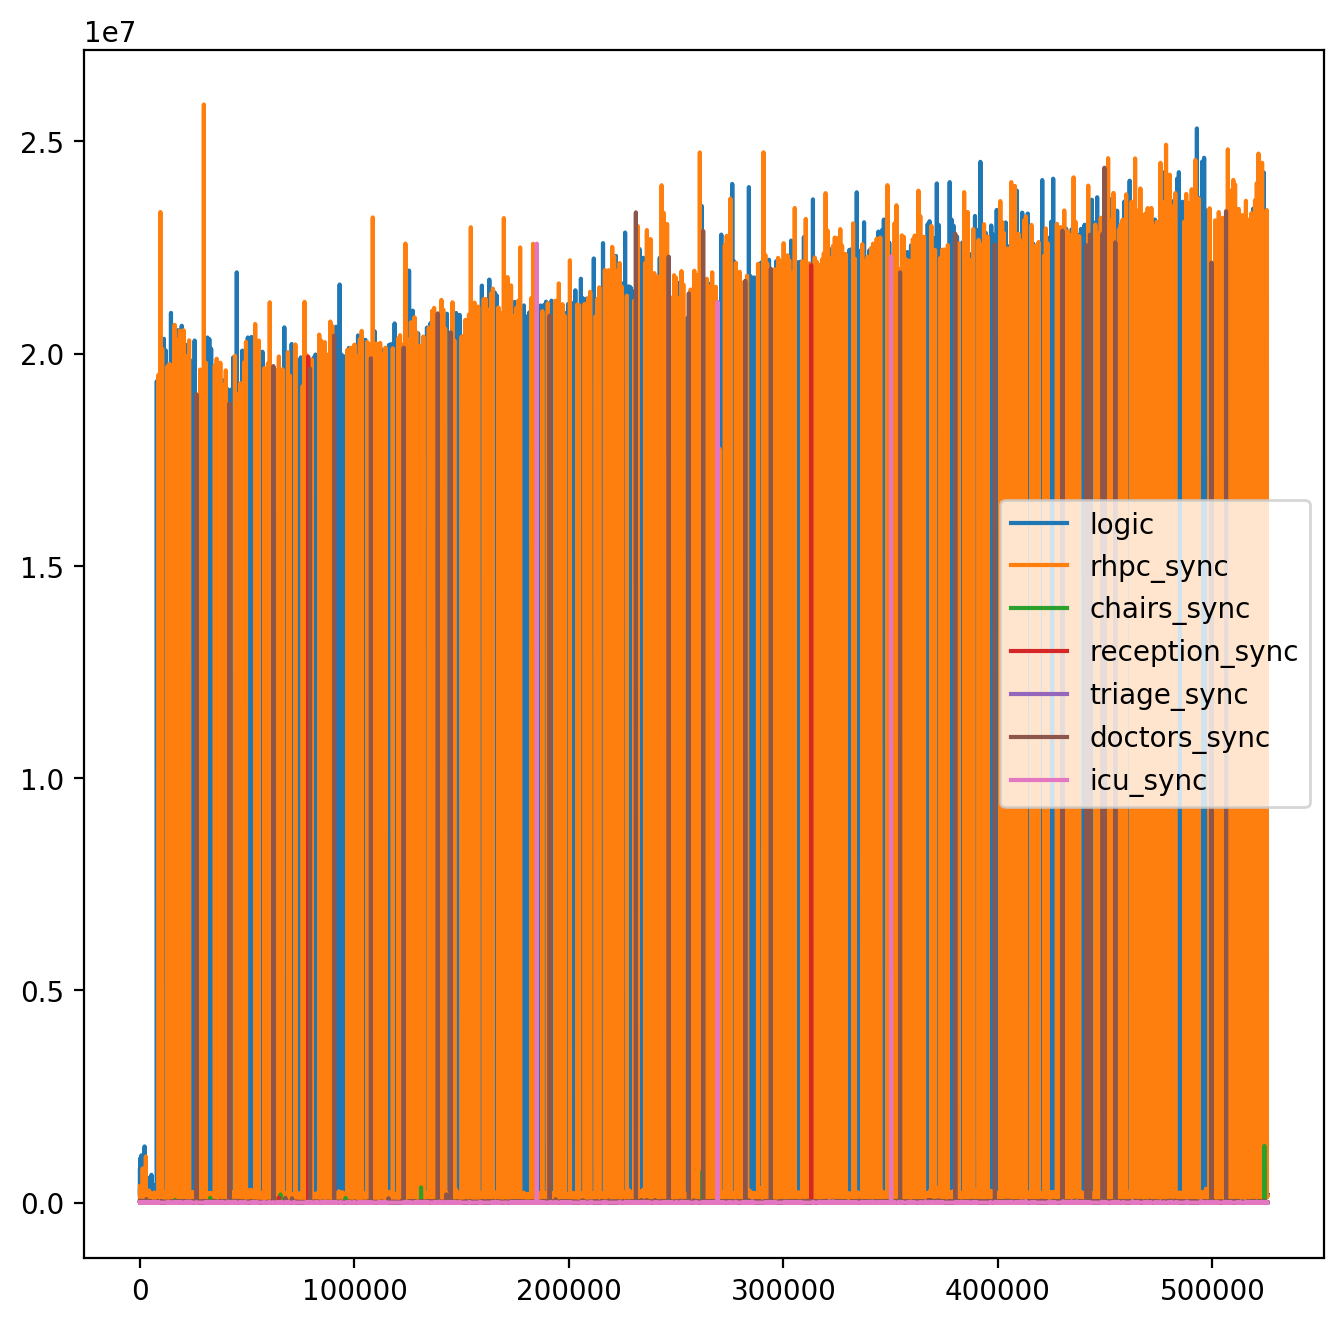

In [22]:
metrics.plot().plot(0)

# Analiza el comportamiento de los agentes

In [23]:
import postprocess as pp

In [24]:
agents = pp.AgentsOutput(f"{run.folder}")

In [25]:
df = agents.humans

In [26]:
df[df['infected_by'] == 'icu_environment']

,repast_id,type,entry_time,exit_time,last_state,process,infection_id,infection_model,infection_mode,infection_stage,infection_time,infected_by


['' 'NO_ATTENTION' 'WAIT_IN_DOCTOR' 'WAIT_CHAIR_2' 'WAIT_CHAIR_1'
 'RESOLVE' 'WAIT_CHAIR_3' 'MORGUE' 'WAIT_ICU']


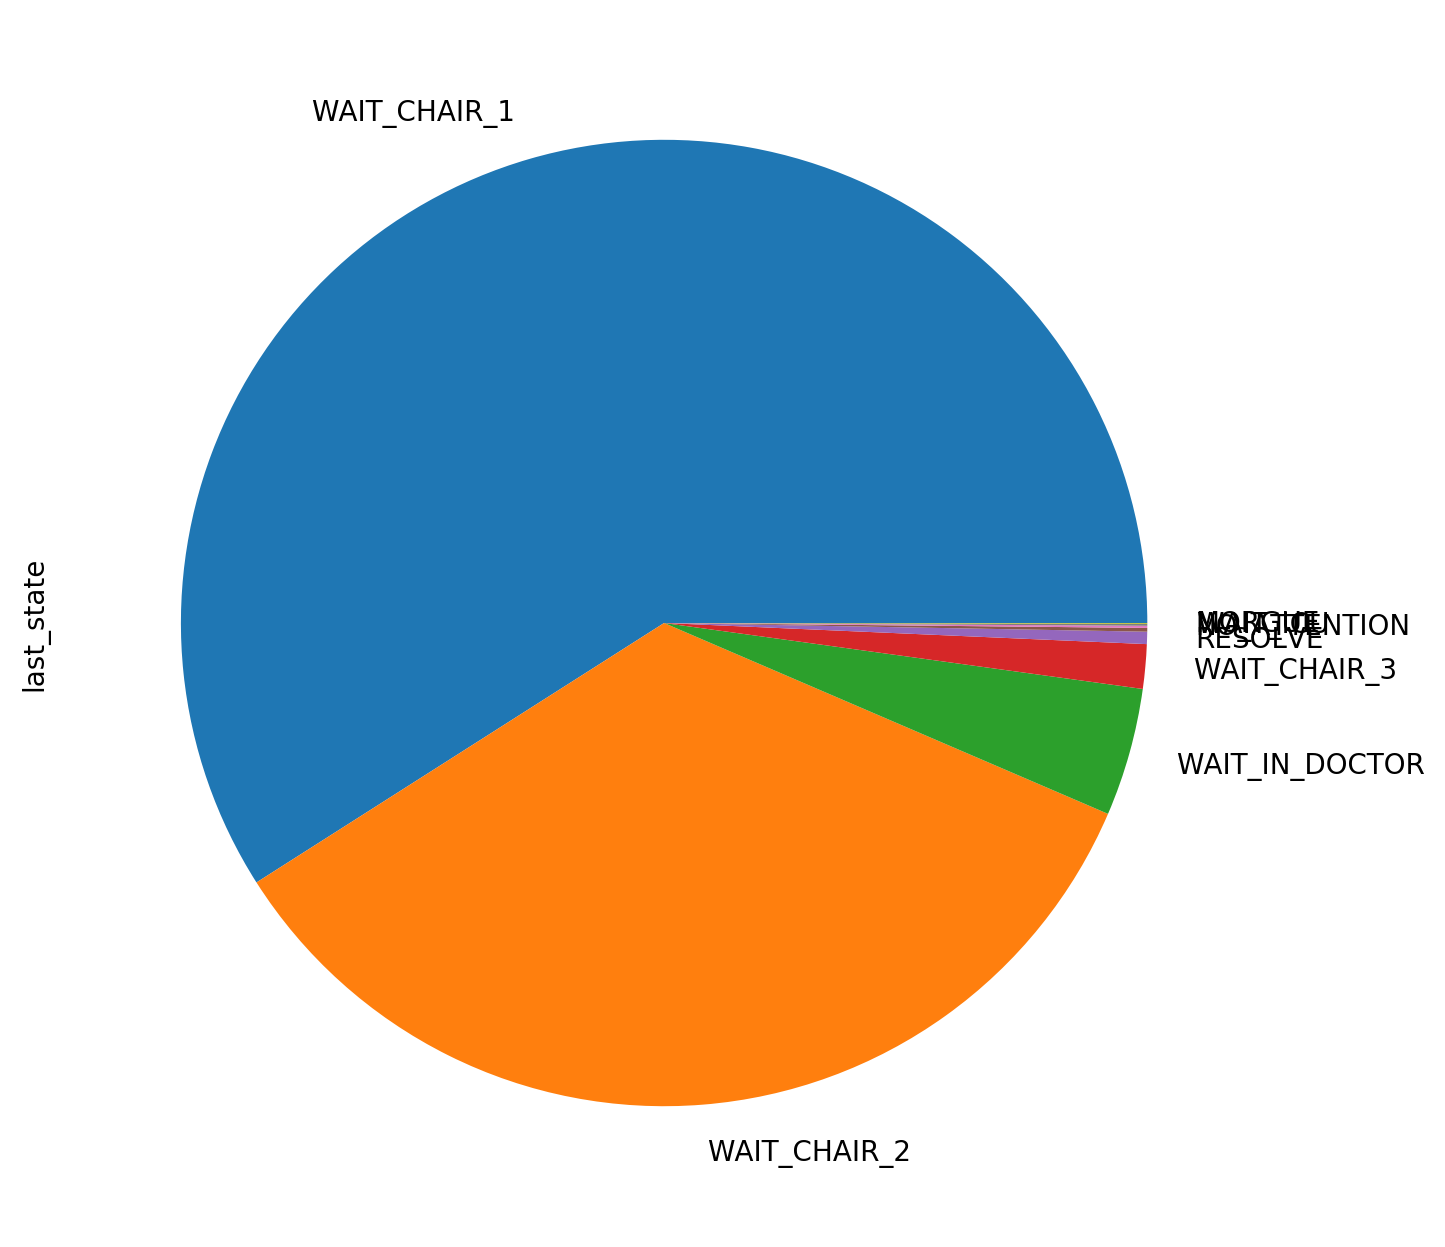

In [27]:
patients = agents.humans[agents.humans['type'] == 'patient']
print(f"{patients['last_state'].unique()}")
# patients['last_state'].hist(xrot=90, bins=len(patients['last_state'].unique()), grid=False)
patients['last_state'].value_counts().plot.pie()

In [28]:
objs = agents.objects
objs

,process,infection_id,infection_stage,infection_model,infections
0,0,bed.0.0,contaminated,object,"[[human.11.0.1, {'time': 13380}], [human.11.0...."
1,0,bed.0.1,clean,object,"[[human.23.0.1, {'time': 45600}], [human.23.0...."
2,0,bed.0.2,contaminated,object,"[[human.25.0.1, {'time': 51420}], [human.25.0...."
3,0,bed.0.3,contaminated,object,"[[human.500.0.1, {'time': 536640}], [human.500..."
4,0,bed.0.4,contaminated,object,"[[human.555.0.1, {'time': 597540}], [human.555..."
0,0,chair.0.5,contaminated,object,"[[human.15.0.1, {'time': 6180}], [human.15.0.1..."
1,0,chair.0.6,contaminated,object,"[[human.12.0.1, {'time': 5220}], [human.19.0.1..."
2,0,chair.0.7,contaminated,object,"[[human.13.0.1, {'time': 5820}], [human.13.0.1..."
3,0,chair.0.8,contaminated,object,"[[human.14.0.1, {'time': 5460}], [human.14.0.1..."
4,0,chair.0.9,contaminated,object,"[[human.16.0.1, {'time': 7860}], [human.16.0.1..."


In [29]:
df = agents.humans

In [30]:
df['last_state'].unique()

array(['', 'NO_ATTENTION', 'WAIT_IN_DOCTOR', 'WAIT_CHAIR_2',
       'WAIT_CHAIR_1', 'RESOLVE', 'WAIT_CHAIR_3', 'MORGUE', 'WAIT_ICU',
       nan], dtype=object)

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv(f"{run.folder}/chair_availability.p0.csv")

In [33]:
df['free_chairs'].describe()

count    525599.000000
mean          0.425301
std           0.880780
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          35.000000
Name: free_chairs, dtype: float64

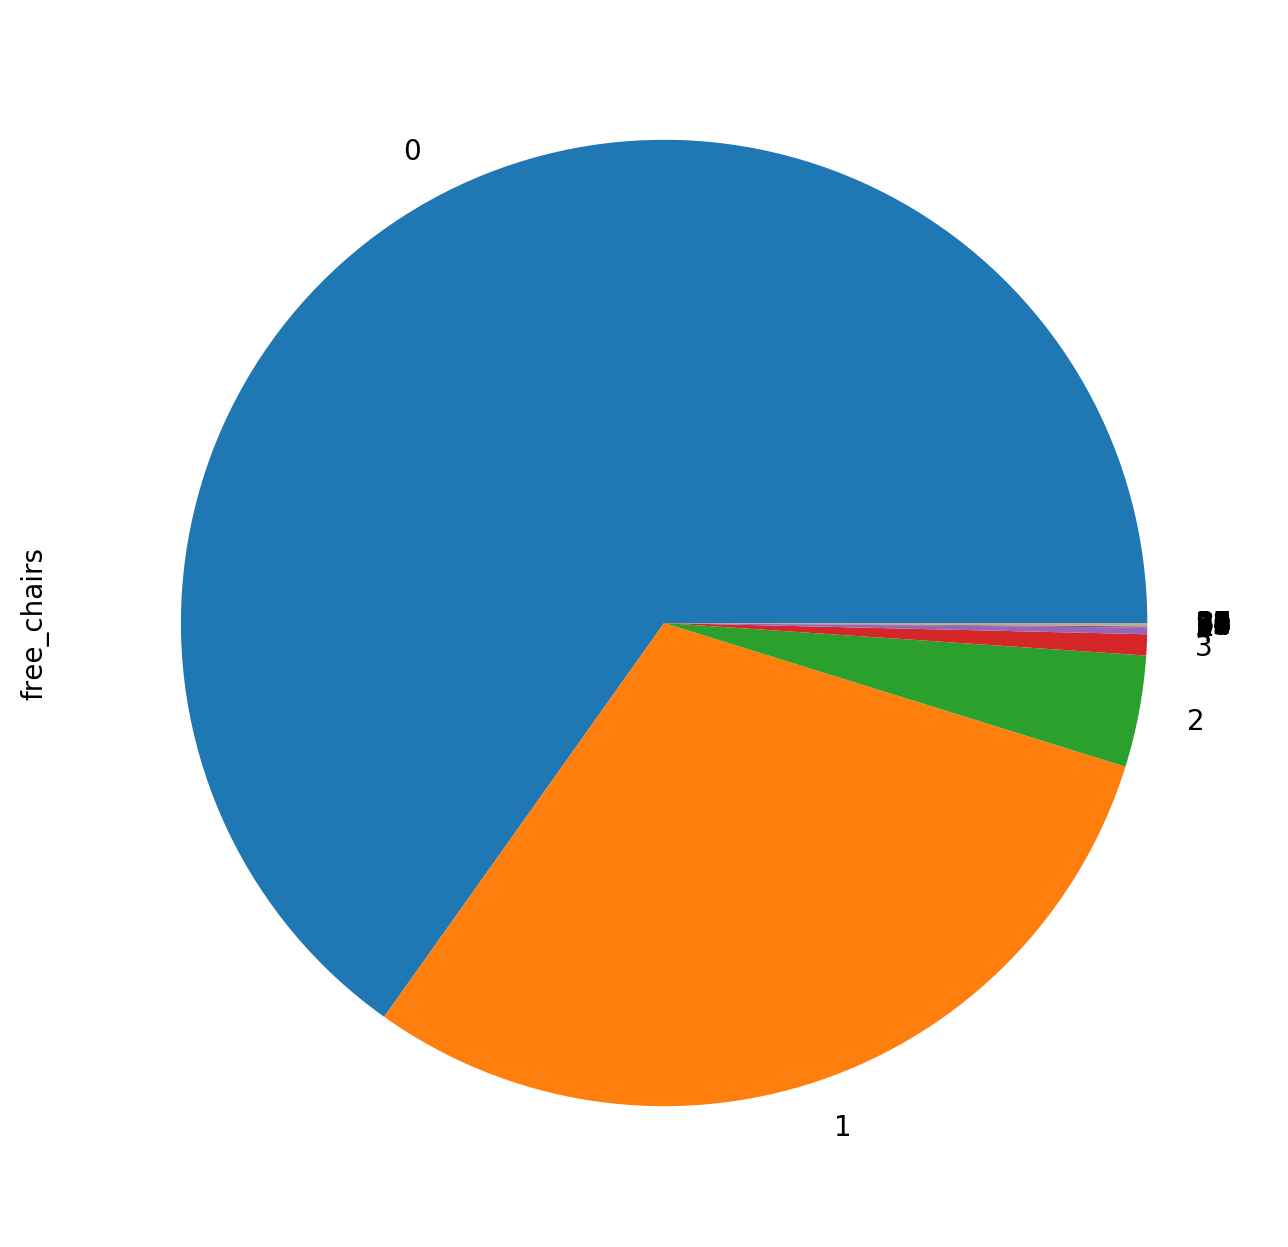

In [34]:
df['free_chairs'].value_counts().plot.pie()

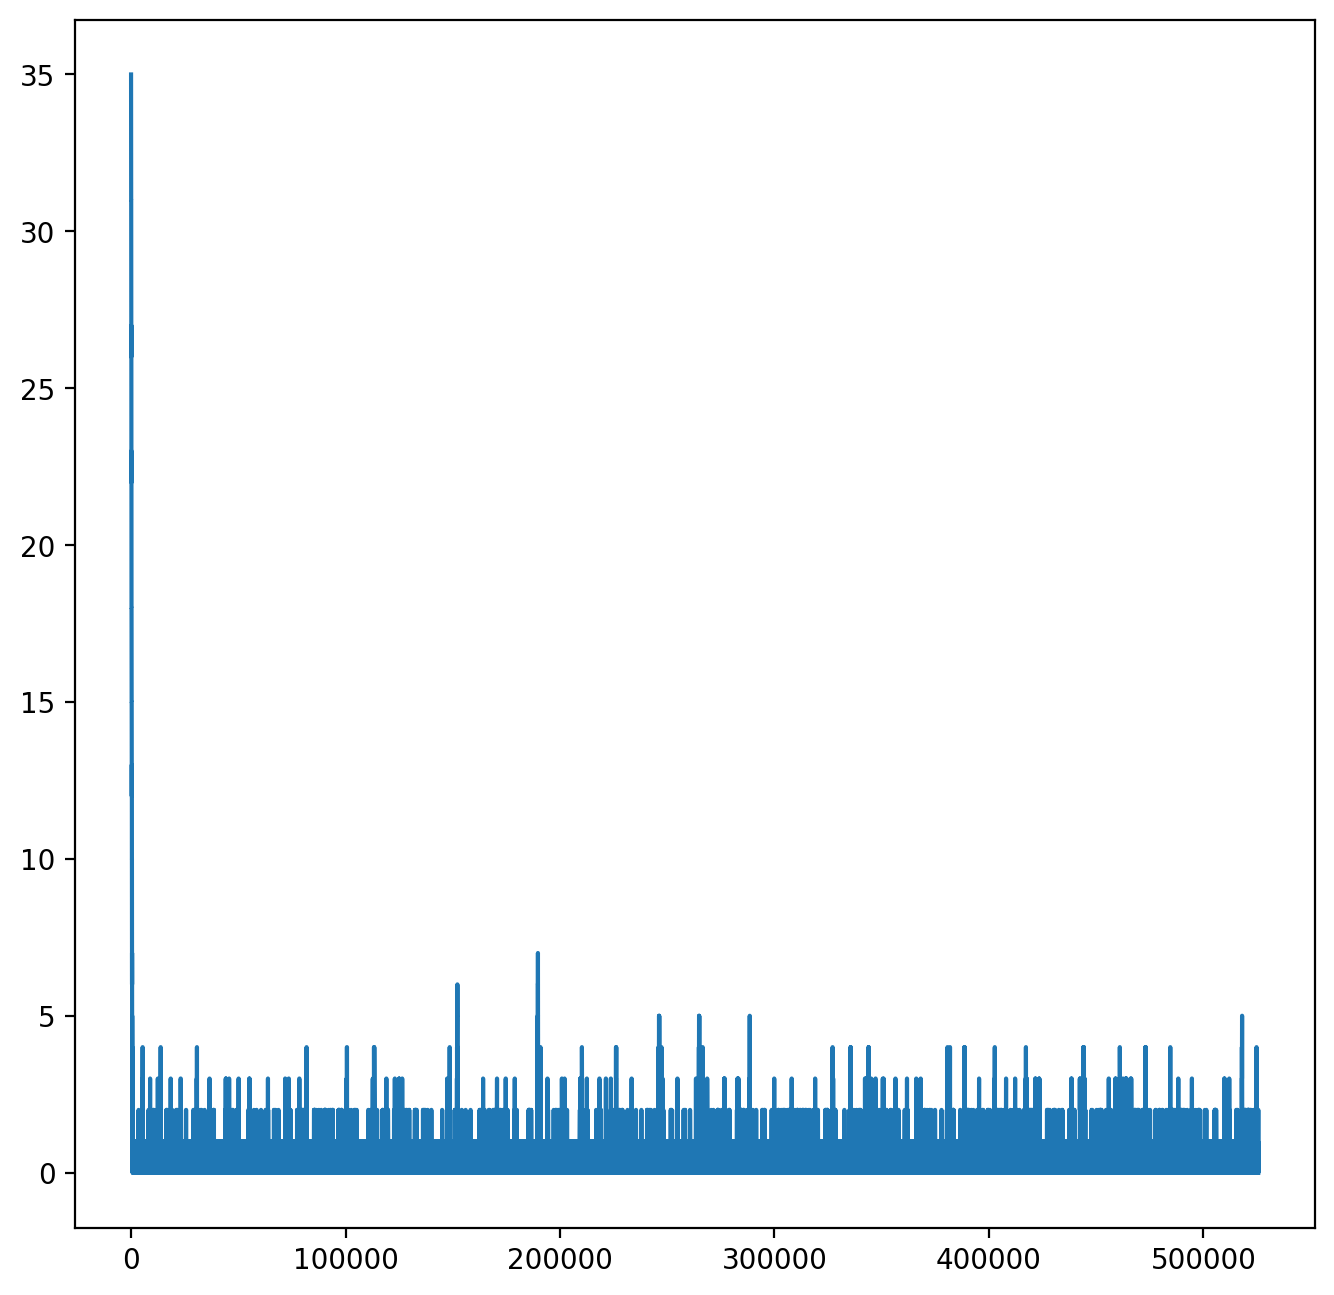

In [35]:
df['free_chairs'].plot()